### cifar-10 이미지 분류 v1

In [2]:
import numpy as np 
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [3]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
X_train.shape, X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 32, 32, 3), (50000, 1))

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

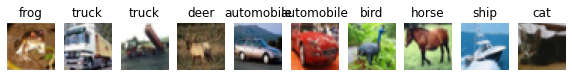

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i]), plt.axis('off')
    plt.title(class_names[y_train[i,0]])
plt.show()

In [7]:
# X_data : 0~1 사이의 실수(float32)로 변환   # 정규화 작업

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype(np.float32) /255.

In [8]:
# y_data : one-hot encoding

from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train) 
Y_test = to_categorical(y_test)

- 모델 정의/설정/학습/평가

In [9]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [10]:
model = Sequential([ 
    Conv2D(32, (3,3), padding='same', input_shape=(32,32,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [11]:
model.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model_path = 'best-cifar10-v1.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

In [13]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=100, batch_size=32, verbose=2, 
    callbacks=[checkpoint, early_stop]
)

Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.57214, saving model to best-cifar10-v1.h5
1250/1250 - 22s - loss: 1.8285 - accuracy: 0.3275 - val_loss: 1.5721 - val_accuracy: 0.4281 - 22s/epoch - 17ms/step
Epoch 2/100

Epoch 00002: val_loss improved from 1.57214 to 1.37858, saving model to best-cifar10-v1.h5
1250/1250 - 6s - loss: 1.5200 - accuracy: 0.4434 - val_loss: 1.3786 - val_accuracy: 0.5064 - 6s/epoch - 5ms/step
Epoch 3/100

Epoch 00003: val_loss improved from 1.37858 to 1.27194, saving model to best-cifar10-v1.h5
1250/1250 - 6s - loss: 1.3923 - accuracy: 0.4960 - val_loss: 1.2719 - val_accuracy: 0.5536 - 6s/epoch - 5ms/step
Epoch 4/100

Epoch 00004: val_loss improved from 1.27194 to 1.24491, saving model to best-cifar10-v1.h5
1250/1250 - 6s - loss: 1.2960 - accuracy: 0.5365 - val_loss: 1.2449 - val_accuracy: 0.5505 - 6s/epoch - 5ms/step
Epoch 5/100

Epoch 00005: val_loss improved from 1.24491 to 1.19645, saving model to best-cifar10-v1.h5
1250/1250 - 7s - loss: 1.2164

In [14]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6455 - accuracy: 0.7862


[0.6454523205757141, 0.7861999869346619]

- 학습과정 시각화


In [15]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

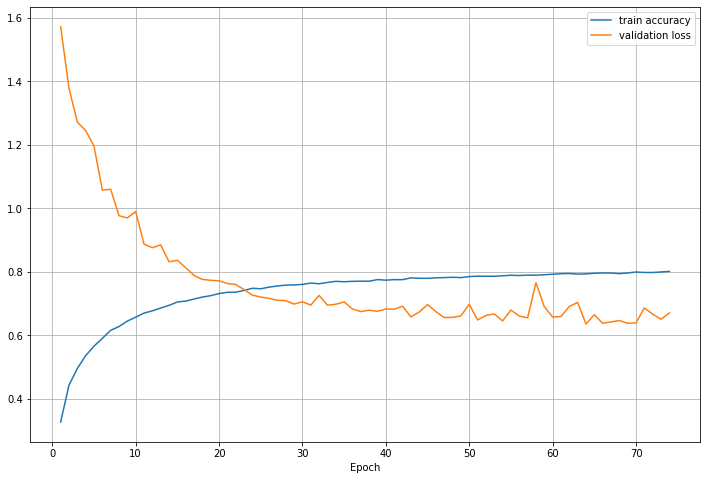

In [16]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()